# Projection Plots

<div class="alert alert-block alert-info">
 
## Goals:

* Introduce `ProjectPlot` class and understand the difference from `SlicePlot`
* Introduce off-axis plots
* Learn how to annotate projection plots and change their style
    
</div>

In [1]:
import yt

In [2]:
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2020-03-24 08:46:55,950 Files located at /home/zingale/.cache/yt/IsolatedGalaxy.tar.gz.untar/IsolatedGalaxy/galaxy0030/galaxy0030
yt : [INFO     ] 2020-03-24 08:46:55,951 Default to loading galaxy0030/galaxy0030 for IsolatedGalaxy dataset
yt : [INFO     ] 2020-03-24 08:46:56,076 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-03-24 08:46:56,076 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-03-24 08:46:56,077 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-24 08:46:56,079 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-03-24 08:46:56,081 Parameters: cosmological_simulation   = 0.0


## A First Plot

A slice plot is simply passing a plane through your dataset and recording the data values that the plane intersects.  

A projection plot is the result of integrating the data through the domain along a particular direction.

Both of these operations results in a 2-d representation of 3-d data.

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 3788.34it/s]
yt : [INFO     ] 2020-03-24 08:46:56,152 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-03-24 08:46:58,554 Projection completed
yt : [INFO     ] 2020-03-24 08:46:58,555 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:58,556 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:58,557 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:58,559 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:58,561 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



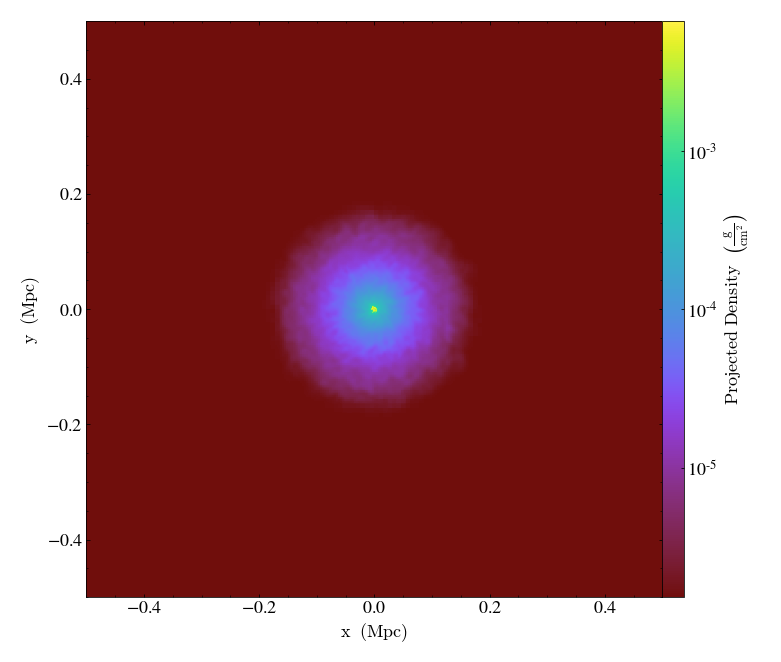

In [3]:
yt.ProjectionPlot(ds, "z", "density")

Compare to the similar slice plot

yt : [INFO     ] 2020-03-24 08:46:59,878 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:59,879 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:59,880 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:59,883 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:46:59,885 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



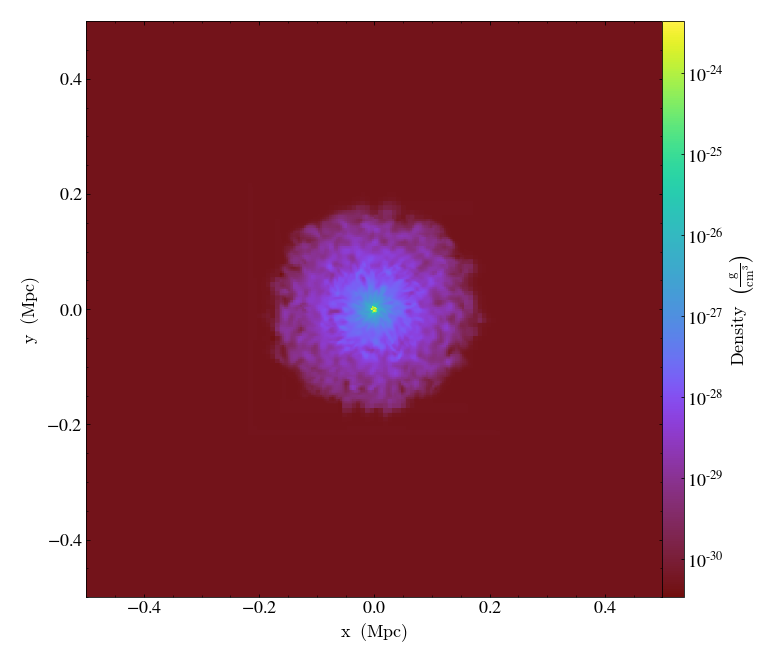

In [4]:
yt.SlicePlot(ds, "z", "density")

Some observations:
    
* The units on the color scale are different, representing that one is a slice and the other is an integral
* The finer structure that appears in the slice is not as strong in the projection

## Projection Types

### unweighted 

The default projection is an *unweighted projection*.

An unweighted projection along the z-direction does the following integral:
$$
F(x, y) = \int f(x, y, z) dz
$$
Here, $f(x, y, z)$ are the data values for our chosen field (`"density"` in the above image), and $F(x, y)$ is the resulting projection / image.  Notice that it is two-dimensional, since we integrated out one of the dimension.

For a projection in an arbitrary direction, we'd write:
$$
F(q_1, q_2) = \int f({\bf x}) \hat{{\bf n}} \cdot d{\bf x}
$$
where $\hat{\bf n}$ is the unit normal and $q_1$ and $q_2$ are the two coordinate directions orthognal to $\hat{\bf n}$.

Notice that the units are the units of $f$ $\times$ `length`.

### weighted

A weighted projection along the z-direction does the following integral:
$$
F(x, y) = \frac{\int f(x, y, z) w(x, y, z) dz}{\int w(x, y, z) dz}
$$
Here, $w(x, y, z)$ is another field from your dataset and acts as a weight.  

Note: due to the normalization, the resulting projection, $F(x, y)$ has the same units as $f(x, y, z)$.

The general form is:
$$
F(q_1, q_2) = \frac{\int f({\bf x}) w({\bf x}) \hat{\bf n} \cdot d{\bf x}}
                   {\int w({\bf x}) \hat{\bf n} \cdot d{\bf x}}
                   $$

see https://yt-project.org/docs/dev/visualizing/plots.html#types-of-projections for more details

## Weighted Projection

Let's make a density-weighted projection of temperature

yt : [INFO     ] 2020-03-24 08:47:01,107 Projection completed
yt : [INFO     ] 2020-03-24 08:47:01,107 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:01,108 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:01,109 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:01,110 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:01,112 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-24 08:47:01,263 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



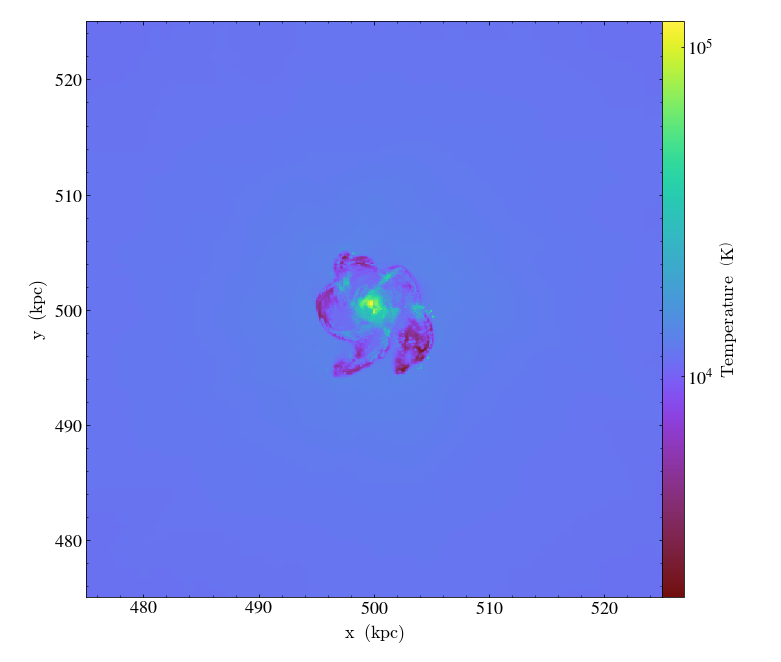

In [5]:
p = yt.ProjectionPlot(ds, "z", "temperature", weight_field="density", origin="native")
p.zoom(20)

Compare to the corresponding unweighted projection:

yt : [INFO     ] 2020-03-24 08:47:02,101 Projection completed
yt : [INFO     ] 2020-03-24 08:47:02,102 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,103 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,104 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,104 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,107 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-24 08:47:02,284 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



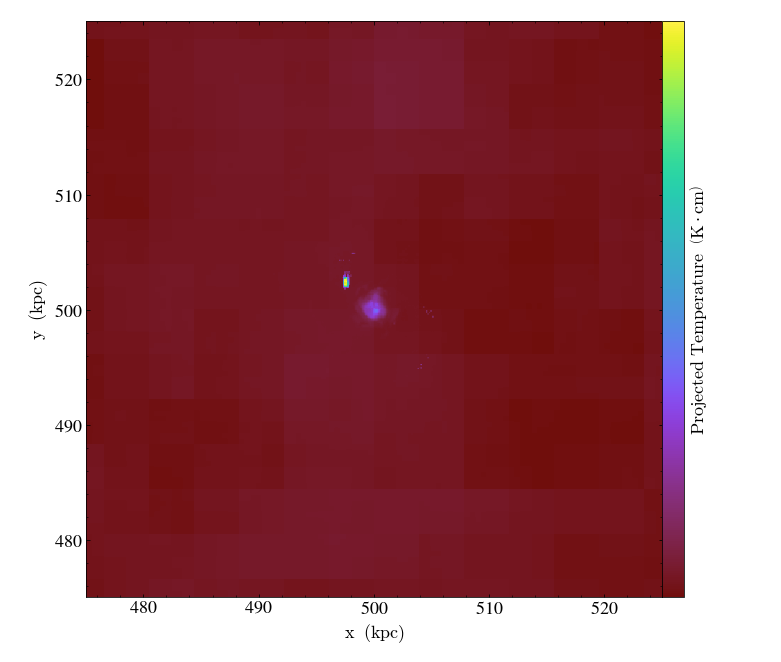

In [6]:
p = yt.ProjectionPlot(ds, "z", "temperature", origin="native")
p.zoom(20)

and the corresponding slice plot:

yt : [INFO     ] 2020-03-24 08:47:02,729 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,730 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,731 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,732 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:02,734 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-24 08:47:02,913 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



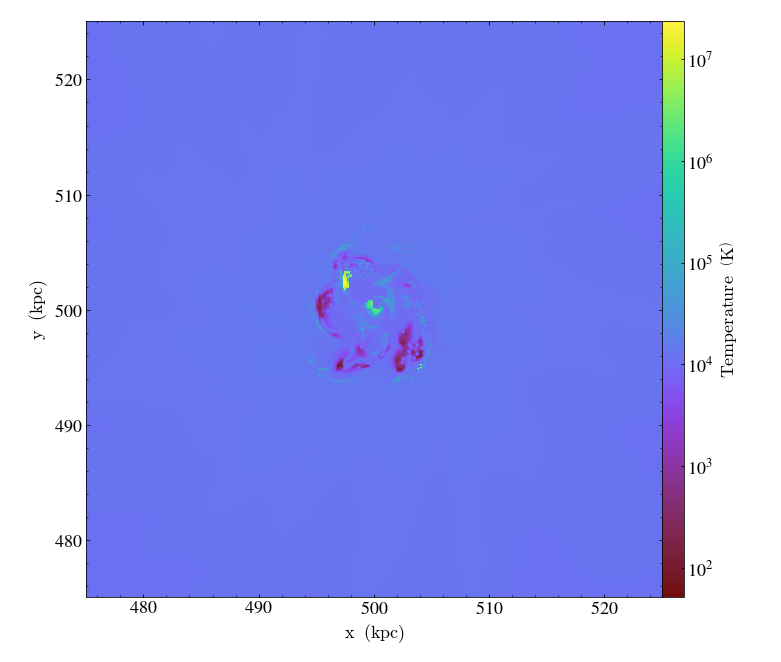

In [7]:
sp = yt.SlicePlot(ds, "z", "temperature", origin="native")
sp.zoom(20)

## Thin-Slice Projections

Here, instead of doing the integral over the full z-extent to the domain, we limit it to a narrow region.  In the limit that the width of the region goes to one zone in our simulation, the projection will approach a slice plot

https://yt-project.org/docs/dev/cookbook/complex_plots.html#thin-slice-projections

We start by making a region the full extent in x and y, but just 40 kpc in z, centered on the center of the domain

In [8]:
center = ds.domain_center
lower_left = ds.domain_left_edge
upper_right = ds.domain_right_edge

depth = ds.quan(40, "kpc")

lower_left[2] = center[2] - 0.5*depth
upper_right[2] = lower_left[2] + depth

region = ds.box(lower_left, upper_right)

In [9]:
print(region)

YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0.00000000e+00 0.00000000e+00 1.48128645e+24] cm, right_edge=[3.08600000e+24 3.08600000e+24 1.60471355e+24] cm


Now when we make the projection, we use the keyword argument `data_source` to pass in the region to operate over

yt : [INFO     ] 2020-03-24 08:47:03,486 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:03,487 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:03,488 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:03,489 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:03,491 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



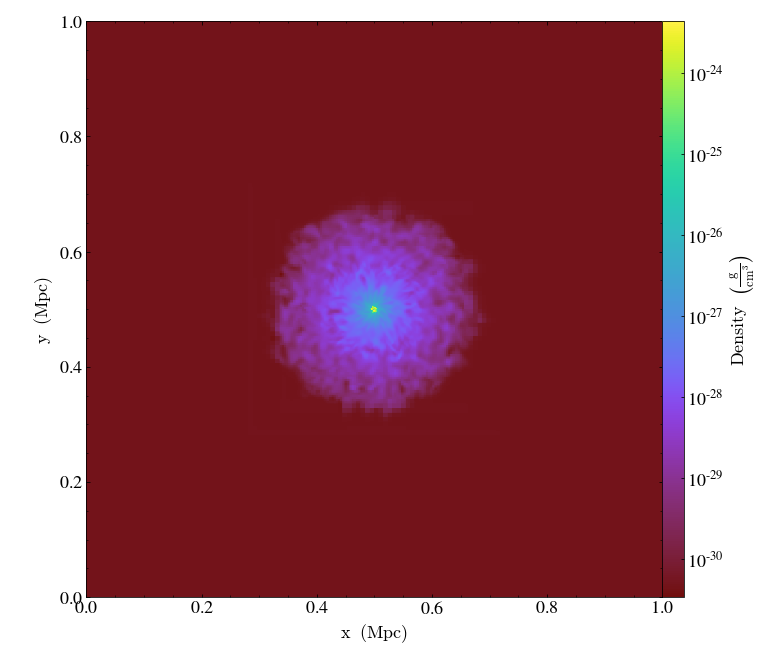

In [10]:
p = yt.SlicePlot(ds, "z", "density",
                      origin="native", data_source=region)
p

<div class="alert alert-block alert-success">

Important: zones only participate in the projection if their centers fall inside the region.  If you make this region too thin, then coarse zones (from the lower AMR levels) will not participate
    
</div>


## Off-Axis Projections

So far, for both slices and projections, we've always been taking the normal to be along one of the coordinate axes.  However, we can use an arbitrary normal for this.

For an off-axis projection plot, it will use the same infrastructure as with volume rendering to shoot rays at oblique angles through the domain.  Since there is no natural grid that defines the resolution of the off-axis plane, a fixed-resolution buffer will be created (by default 800 x 800 pixels).



yt : [INFO     ] 2020-03-24 08:47:07,185 xlim = -0.024997 0.024997
yt : [INFO     ] 2020-03-24 08:47:07,185 ylim = -0.024997 0.024997
yt : [INFO     ] 2020-03-24 08:47:07,186 zlim = -0.500000 0.500000
yt : [INFO     ] 2020-03-24 08:47:07,187 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


Angular momentum vector: [8.85748212e+25 8.51990642e+25 4.99255795e+28] cm**2/s cm**2/s



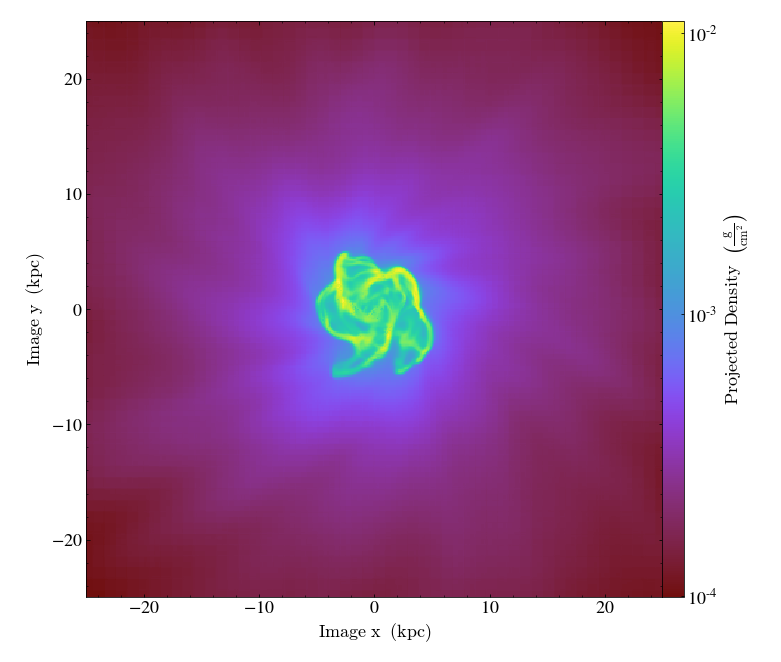

In [11]:
sp = ds.sphere("center", (15.0, "kpc"))

# Get the angular momentum vector for the sphere.
L = sp.quantities.angular_momentum_vector()

print("Angular momentum vector: {0}".format(L))

# Create an OffAxisProjectionPlot of density centered on the object with the L
# vector as its normal and a width of 25 kpc on a side
p = yt.OffAxisProjectionPlot(ds, L, "density", center=sp.center, width=(50, "kpc"))
p

Some notes:

* Instead of a coordinate direction, "x", "y", or "z", we pass a vector in as the normal.  This is just a sequence of floats.

* For very fine detail, we will want to use a higher-resolution image buffer, see the `.set_buff_size()` option

We can generally do the same operations we did with slice plots for projections, like zooming

yt : [INFO     ] 2020-03-24 08:47:13,589 xlim = -0.500000 0.500000
yt : [INFO     ] 2020-03-24 08:47:13,595 ylim = -0.500000 0.500000
yt : [INFO     ] 2020-03-24 08:47:13,597 zlim = -0.500000 0.500000
yt : [INFO     ] 2020-03-24 08:47:13,605 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-03-24 08:47:15,582 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



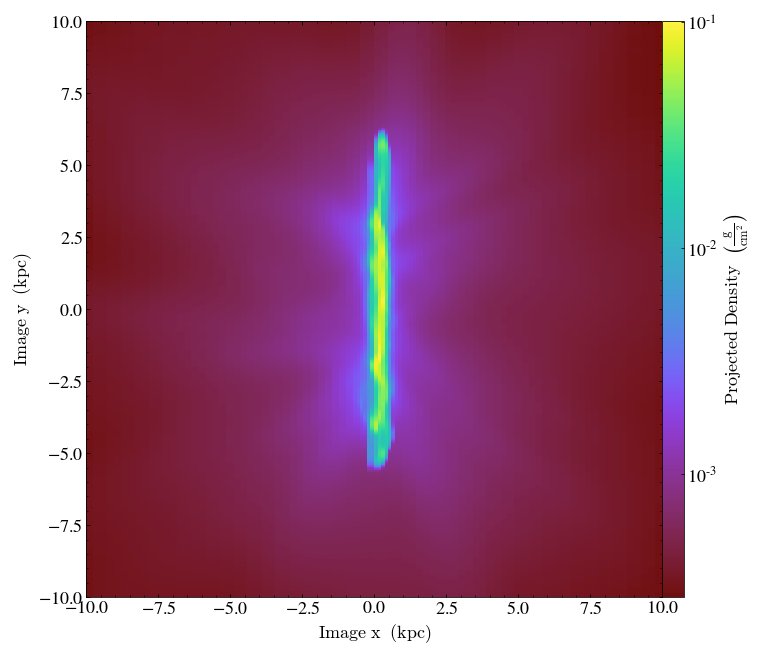

In [12]:
N = (1, 1, 0)
p2 = yt.OffAxisProjectionPlot(ds, N, "density")
p2.zoom(50)

More details can be found here:
https://yt-project.org/docs/dev/reference/api/yt.visualization.plot_window.html#yt.visualization.plot_window.OffAxisProjectionPlot  


## Regions

Projections can be done on all sorts of regions, not just boxes

In [13]:
sphere = ds.sphere((0.5, 0.5, 0.5), (20, "kpc"))

yt : [INFO     ] 2020-03-24 08:47:26,095 Projection completed
yt : [INFO     ] 2020-03-24 08:47:26,096 xlim = 0.485002 0.514998
yt : [INFO     ] 2020-03-24 08:47:26,097 ylim = 0.485002 0.514998
yt : [INFO     ] 2020-03-24 08:47:26,098 xlim = 0.485002 0.514998
yt : [INFO     ] 2020-03-24 08:47:26,099 ylim = 0.485002 0.514998
yt : [INFO     ] 2020-03-24 08:47:26,102 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
/usr/lib64/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



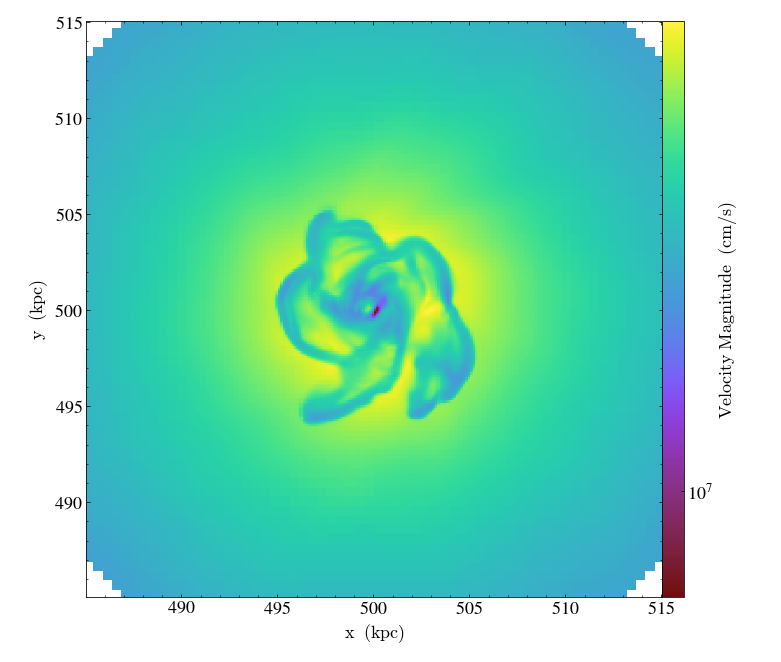

In [14]:
p = yt.ProjectionPlot(ds, "z", "velocity_magnitude", weight_field="density",
                      data_source=sphere,
                      origin="native", width=(30, "kpc"))
p

## Annotations

As with slice plots, there are _many_ annotations that can be added to projections.  yt calls these _callbacks_.  Here are the docs:

https://yt-project.org/docs/dev/visualizing/callbacks.html#callbacks


We'll start with a clean projection

yt : [INFO     ] 2020-03-24 08:47:27,308 Projection completed
yt : [INFO     ] 2020-03-24 08:47:27,309 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:27,310 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:27,312 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:27,313 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-24 08:47:27,314 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



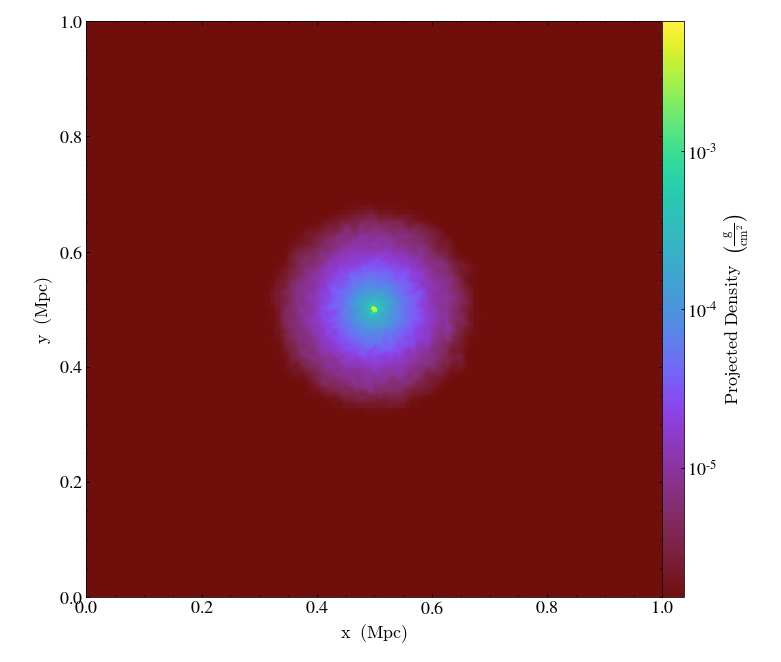

In [15]:
p = yt.ProjectionPlot(ds, "z", "density", origin="native")
p

Now let's draw a circle at a radius of 30 kpc


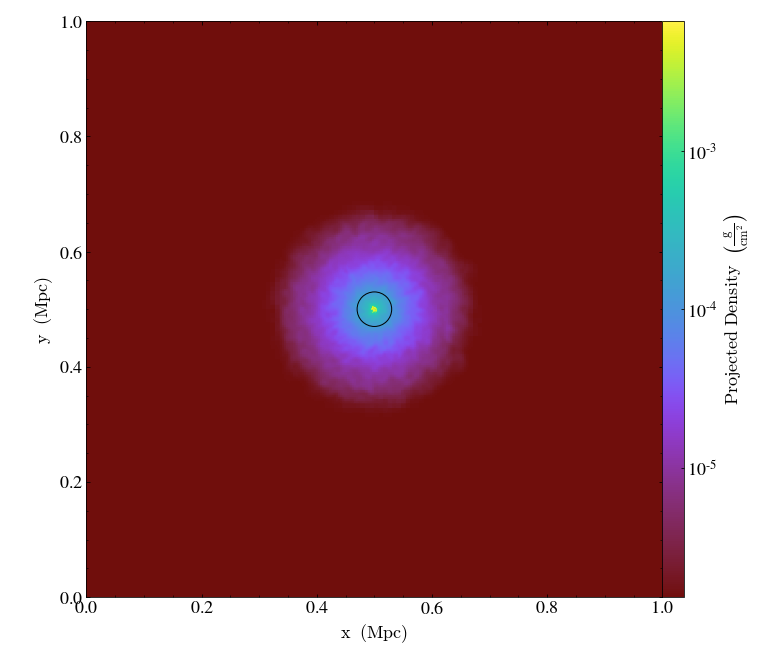

In [16]:
p.annotate_sphere([0.5, 0.5, 0.5], radius=(30, 'kpc'),
                  circle_args={'color':'black'})

and add a title


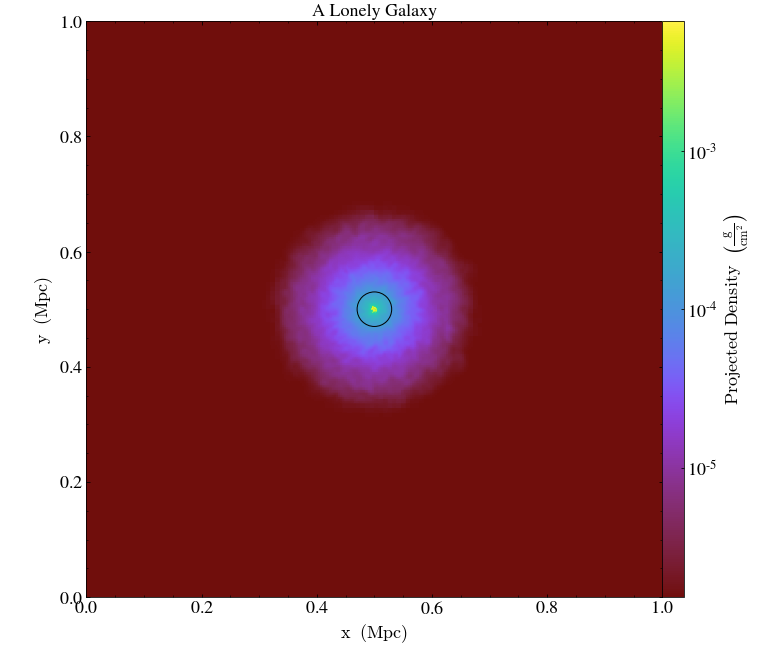

In [17]:
p.annotate_title("A Lonely Galaxy")

and add the time


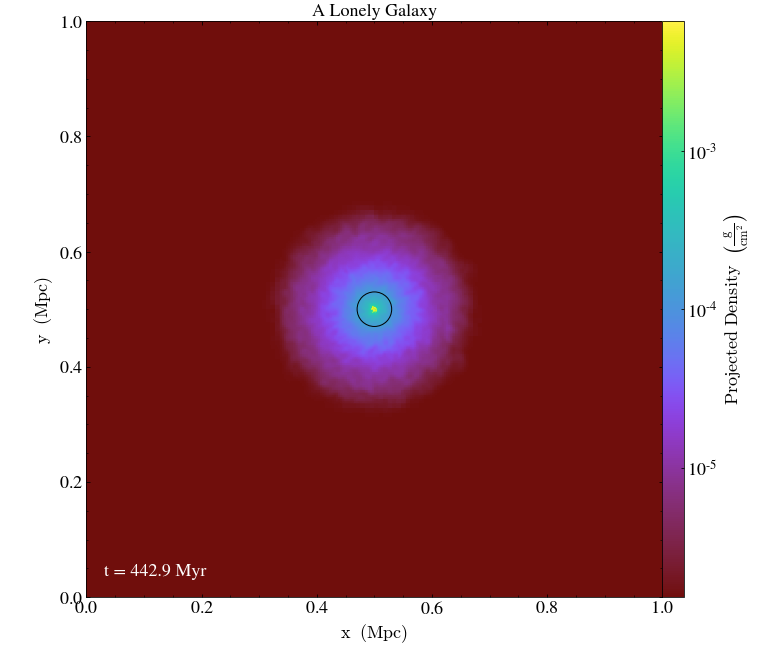

In [18]:
p.annotate_timestamp()

Notice that each annotation is added to the other.  The callbacks are stored in a list inside the plot object

In [19]:
for i, cb in enumerate(p._callbacks):
    print(i, cb)

0 ('SphereCallback', ((<yt.visualization.plot_window.ProjectionPlot object at 0x7fda33157910>, [0.5, 0.5, 0.5]), {'radius': (30, 'kpc'), 'circle_args': {'color': 'black', 'fill': False}}))
1 ('TitleCallback', ((<yt.visualization.plot_window.ProjectionPlot object at 0x7fda33157910>, 'A Lonely Galaxy'), {}))
2 ('TimestampCallback', ((<yt.visualization.plot_window.ProjectionPlot object at 0x7fda33157910>,), {}))


We can delete a callback with the `.annotate_clear()` method.  If we pass an index, the that callback is removed.  If we pass `-1`, the the last is removed (just like accessing the last element in a python list).

Let's remove the title


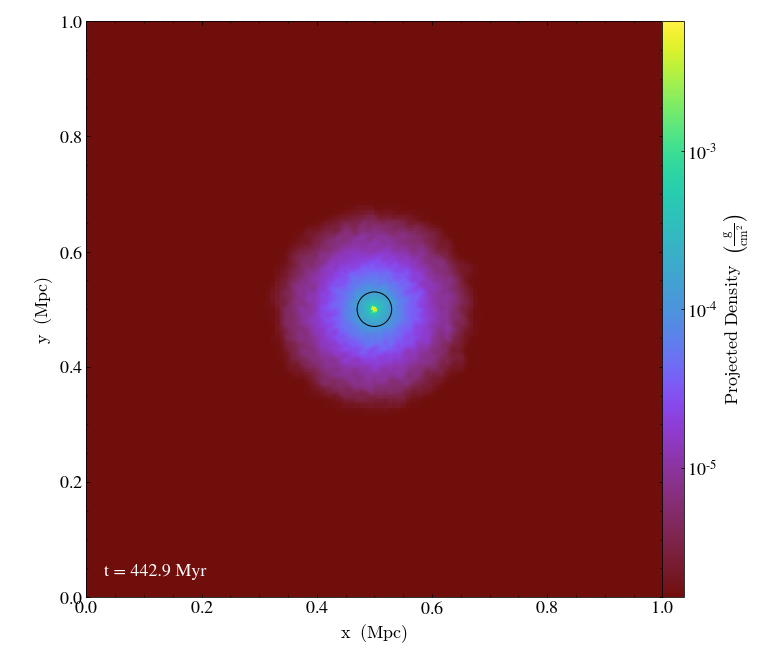

In [20]:
p.annotate_clear(1)

<div class="alert alert-block alert-warning">

## Afternoon Exercise
    
There are a number of annotations that can be made to both projection plots and slice plots.  A good example is described here: https://yt-project.org/docs/dev/cookbook/simple_plots.html#annotating-plots-to-include-lines-text-shapes-etc

Try some of these annotations on both slice and projection plots
</div>